# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [123]:
df = pd.read_csv('../data/states_edu.csv')
df.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,1715.000000,1.224000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.224000e+03,...,1632.000000,1632.000000,1632.000000,1.020000e+03,1.071000e+03,1.632000e+03,565.000000,602.000000,650.000000,562.000000
mean,2002.075219,9.175416e+05,9.102045e+06,7.677799e+05,4.223743e+06,4.110522e+06,9.206242e+06,4.768010e+06,2.682587e+06,4.299509e+05,...,69166.507966,68106.537377,58420.870711,5.779547e+05,2.820691e+05,9.139695e+05,236.327434,278.280731,218.806154,263.558719
std,9.568621,1.066514e+06,1.175962e+07,1.146992e+06,5.549735e+06,5.489562e+06,1.199279e+07,6.300569e+06,3.357214e+06,5.347893e+05,...,79957.990356,77965.847263,67438.530709,6.757837e+05,3.307098e+05,1.055893e+06,9.285505,10.343482,7.681805,6.612601
min,1986.000000,4.386600e+04,4.656500e+05,3.102000e+04,0.000000e+00,2.209300e+04,4.816650e+05,2.655490e+05,1.399630e+05,1.154100e+04,...,4577.000000,3371.000000,2572.000000,3.769800e+04,1.353000e+04,6.844900e+04,192.000000,231.000000,179.000000,236.000000
25%,1994.000000,2.645145e+05,2.189504e+06,1.899575e+05,1.165776e+06,7.151210e+05,2.170404e+06,1.171336e+06,6.380760e+05,1.034492e+05,...,18971.500000,19594.250000,16076.500000,1.649250e+05,8.060800e+04,2.480832e+05,232.000000,272.000000,215.000000,260.000000
50%,2002.000000,6.499335e+05,5.085826e+06,4.035480e+05,2.537754e+06,2.058996e+06,5.242672e+06,2.658253e+06,1.525471e+06,2.717040e+05,...,49087.000000,47880.000000,39408.000000,4.051115e+05,1.869190e+05,6.458050e+05,238.000000,280.500000,220.000000,265.000000
75%,2010.000000,1.010532e+06,1.084516e+07,8.279320e+05,5.055548e+06,4.755293e+06,1.074420e+07,5.561959e+06,3.222924e+06,5.172222e+05,...,78504.250000,78976.000000,69397.250000,6.439752e+05,3.223280e+05,1.043420e+06,242.000000,286.000000,224.000000,268.000000
max,2019.000000,6.307022e+06,8.921726e+07,9.990221e+06,5.090457e+07,3.610526e+07,8.532013e+07,4.396452e+07,2.605802e+07,3.995951e+06,...,493415.000000,500143.000000,498403.000000,3.929869e+06,2.013687e+06,6.441557e+06,253.000000,301.000000,237.000000,280.000000


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [124]:
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)

df.sort_values(by='STATE', ascending=True)

,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,ENROLL_4,ENROLL_8,ENROLL_12,ENROLL_PRIMARY,ENROLL_HS,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
918,2010_ALABAMA,ALABAMA,2010,748889.0,7281058.0,1134111.0,3800128.0,2346819.0,7647571.0,3900492.0,...,59117.0,57992.0,49719.0,467768.0,221940.0,755552.0,NaN,NaN,NaN,NaN
969,2011_ALABAMA,ALABAMA,2011,746933.0,7376725.0,1077070.0,3965614.0,2334041.0,7411768.0,3844055.0,...,56491.0,57919.0,49510.0,461122.0,217615.0,744621.0,231.0,269.0,220.0,258.0
357,1999_ALABAMA,ALABAMA,1999,737639.0,4471546.0,393095.0,2752653.0,1325798.0,4622810.0,2399626.0,...,60012.0,56201.0,42576.0,472019.0,202045.0,740732.0,NaN,NaN,NaN,NaN
1020,2012_ALABAMA,ALABAMA,2012,744621.0,7136949.0,789954.0,3948651.0,2398344.0,7222161.0,3695221.0,...,55859.0,58151.0,48945.0,458974.0,217203.0,744637.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560,2002_WYOMING,WYOMING,2002,87897.0,908719.0,75498.0,443525.0,389696.0,868607.0,463839.0,...,6406.0,6994.0,6631.0,52105.0,28190.0,88116.0,NaN,NaN,221.0,265.0
101,1993_WYOMING,WYOMING,1993,100313.0,615130.0,35437.0,308683.0,271010.0,614807.0,334071.0,...,8046.0,8268.0,6548.0,NaN,NaN,100899.0,NaN,NaN,NaN,NaN
662,2004_WYOMING,WYOMING,2004,86925.0,974888.0,95995.0,507155.0,371738.0,953916.0,483989.0,...,5862.0,6985.0,6323.0,50647.0,27448.0,84733.0,NaN,NaN,NaN,NaN
1625,1986_WYOMING,WYOMING,1986,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7848.0,7247.0,6429.0,NaN,NaN,100955.0,NaN,NaN,NaN,NaN


<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: *average math 8 score*

How many years of data are logged in our dataset? 

In [125]:
column = df["YEAR"]
max_value = column.max()
min_value = column.min()
num_years = max_value - min_value
print(max_value)
print(min_value)
print(num_years)

2019
1986
33


Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [126]:
state = df.groupby("STATE")
state
#print(state["AVG_MATH_4_SCORE"].mean(),
#state["AVG_MATH_8_SCORE"].mean(),
#state["AVG_READING_4_SCORE"].mean(),
#state["AVG_READING_8_SCORE"].mean())

michigan_max = df.loc[df["STATE"] == "MICHIGAN", ["AVG_MATH_8_SCORE"]].max()
ohio_max = df.loc[df["STATE"] == "OHIO", ["AVG_MATH_8_SCORE"]].max()
print(michigan_max, ohio_max)

AVG_MATH_8_SCORE    280.0
dtype: float64 AVG_MATH_8_SCORE    290.0
dtype: float64


Find the average for your outcome score across all states in 2019

In [127]:
 # state = df.groupby("STATE")
state
#math_4_2019 = state["AVG_MATH_4_SCORE"].mean()
#math_8_2019 = state["AVG_MATH_8_SCORE"].mean()
#reading_4_2019 = state["AVG_READING_4_SCORE"].mean()
#reading_8_2019 = state["AVG_READING_8_SCORE"].mean()
#print(math_4_2019, math_8_2019, reading_4_2019, reading_8_2019)

df.loc[df["YEAR"] == 2019, ["AVG_MATH_8_SCORE"]].mean()


AVG_MATH_8_SCORE    281.264151
dtype: float64

Find the maximum outcome score for every state. 

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [128]:
state = df.groupby("STATE")
df["TOTAL_OUTCOME_SCORE"] = df["AVG_MATH_4_SCORE"] + df["AVG_MATH_8_SCORE"] + df["AVG_READING_4_SCORE"] + df["AVG_READING_8_SCORE"]
state
state["TOTAL_OUTCOME_SCORE"].max()

STATE
ALABAMA                  978.0
ALASKA                   993.0
ARIZONA                  999.0
ARKANSAS                 999.0
CALIFORNIA               987.0
COLORADO                1035.0
CONNECTICUT             1035.0
DELAWARE                1017.0
DISTRICT_OF_COLUMBIA     968.0
DODEA                   1057.0
FLORIDA                 1020.0
GEORGIA                 1006.0
HAWAII                   999.0
IDAHO                   1017.0
ILLINOIS                1010.0
INDIANA                 1033.0
IOWA                    1024.0
KANSAS                  1030.0
KENTUCKY                1017.0
LOUISIANA                973.0
MAINE                   1029.0
MARYLAND                1038.0
MASSACHUSETTS           1064.0
MICHIGAN                1000.0
MINNESOTA               1046.0
MISSISSIPPI              990.0
MISSOURI                1018.0
MONTANA                 1035.0
NATIONAL                1017.0
NEBRASKA                1027.0
NEVADA                   990.0
NEW_HAMPSHIRE           1055.0
NE

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [129]:
instruction_expenditure_per_student = df["INSTRUCTION_EXPENDITURE"] / df["ENROLL_ALL"]
percent_instruction_expenditure = df["INSTRUCTION_EXPENDITURE"] / df["TOTAL_EXPENDITURE"]

I thought that the expenditure on instruction per student might affect their academic performance. It also may be helpful to see what part of total expenditure is given to expenditure on instruction as a percent. This could help us see if instruction in schools is a priority

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

Text(0, 0.5, '8th Grade Math Score')

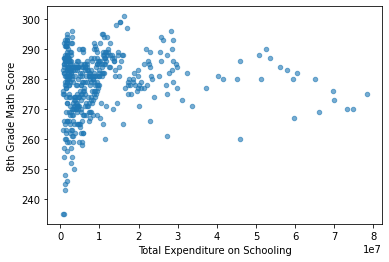

In [130]:
df.plot.scatter(x='TOTAL_EXPENDITURE', y='AVG_MATH_8_SCORE', alpha=0.6)
plt.xlabel('Total Expenditure on Schooling')
plt.ylabel('8th Grade Math Score')

Total Expenditure on Schooling vs. 8th Grade Math Score. There is not a very strong correlation between total expenditure and the 8th grade math scores. The schools who spent the least on schooling had data for the highest and the lowest 8th grade math scores

**Visualization 2**

Text(0, 0.5, '8th Grade Math Score')

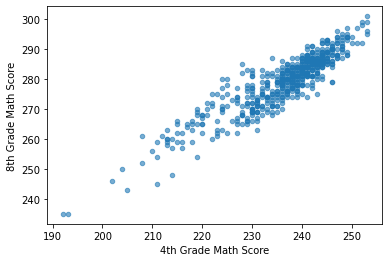

In [131]:
df.plot.scatter(x='AVG_MATH_4_SCORE', y='AVG_MATH_8_SCORE', alpha=0.6)
plt.xlabel('4th Grade Math Score')
plt.ylabel('8th Grade Math Score')

4th Grade Math Score vs. 8th Grade Math Score. There is a strong correlation between 4th and 8th grade math scores. Perhaps students' scores in 4th grade for math would be an indicator as to how well they perform in 8th grade

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [132]:
from sklearn.model_selection import train_test_split

In [133]:
X = df[["AVG_MATH_4_SCORE", 'AVG_READING_8_SCORE', 'ENROLL_8']].dropna()
y = df.loc[X.index]["AVG_MATH_8_SCORE"]
y.fillna(y.mean(), inplace = True)

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [135]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [136]:
# create your model here
model = LinearRegression()

In [137]:
model.fit(X_train, y_train)

LinearRegression()

In [138]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [139]:
print(model.intercept_)
print(model.coef_)
print(model.score(X_test, y_test))
print(np.mean(model.predict(X_test)-y_test))
print(np.mean(np.abs(model.predict(X_test)-y_test)))
np.mean((model.predict(X_test)-y_test)**2)**0.5

-31.171452679566357
[ 7.11807369e-01  5.39544208e-01 -3.49091483e-07]
0.9241237579129834
0.5203599767354633
1.8708541480042316


2.3677808480622837

We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

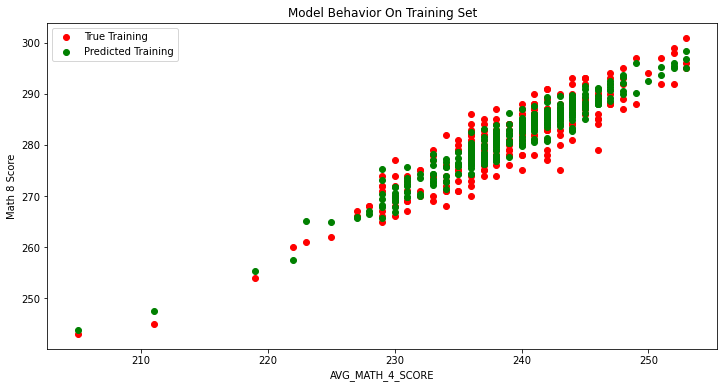

In [140]:
 col_name = 'AVG_MATH_4_SCORE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('Math 8 Score')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

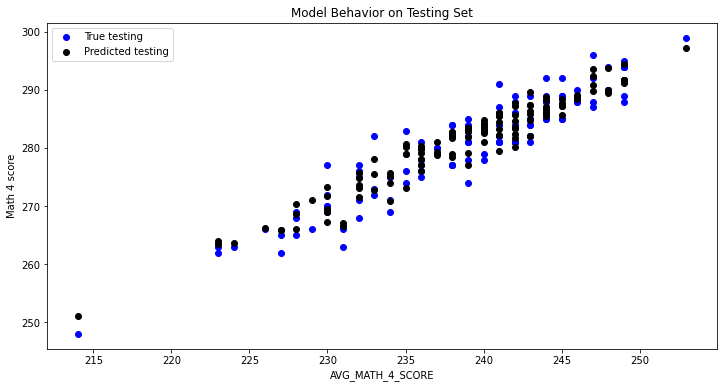

In [141]:
col_name = 'AVG_MATH_4_SCORE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Math 4 score')
plt.title("Model Behavior on Testing Set")

In [142]:
np.sort(y_test - model.predict(X_test))

array([-5.15098368, -5.04523239, -5.03353398, -5.02192272, -4.75360232,
       -4.61837766, -4.39320529, -4.06146668, -3.84079671, -3.8208342 ,
       -3.7398568 , -3.59569704, -3.49634943, -3.45847317, -3.40960599,
       -3.20595539, -3.18366943, -3.05650919, -3.01010069, -3.00107056,
       -2.98261473, -2.85905063, -2.79073312, -2.77995   , -2.77034897,
       -2.71030063, -2.68434094, -2.51838442, -2.51218934, -2.51000413,
       -2.29772225, -2.0454474 , -2.01292173, -1.98537894, -1.81238307,
       -1.51498801, -1.47599746, -1.40856094, -1.36073602, -1.29958405,
       -1.25279257, -1.22806659, -1.13616663, -1.10235293, -1.07461429,
       -1.06227091, -1.0573313 , -1.01326877, -1.00430672, -0.99343214,
       -0.98233214, -0.90880294, -0.83050228, -0.82164758, -0.79489178,
       -0.76465148, -0.69674122, -0.68992235, -0.65305602, -0.6327996 ,
       -0.59191251, -0.52609226, -0.52187464, -0.51770458, -0.49757256,
       -0.46097769, -0.45347167, -0.43824077, -0.24422904, -0.23

<h2> Summary </h2>

WRITE PARAGRAPH HERE
